### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [435]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [436]:
data = pd.read_csv('data/coupons.csv')

In [437]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [438]:
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [439]:
data.shape

(12684, 26)

In [440]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

2. Investigate the dataset for missing or problematic data.

The data shows that a 1% and 99% of the data is missing or corrupt. The data needs to be cleaned before it can be analyzed.
The car shows 99% missing data and the Bar, Coffeehouse, Carryaway, RestarauntLessThan20, Restaurant20To50 shows between .84% and 1.49% missing data. These columns need to be looked into. The age, has_children, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, and Y are classsified as int64. The rest of the catgories are objects. When comparing and analyzing the dataframes, these different data types will be taken into consideration. Comparing an object to an integer or plotting as countplot() on an object can prove to be a challenge. The first step in cleaning the data is removing the car column since this has about 99% of missing data.

Plotting the missing data is teh next step in finding out immediately what data needs to be filled with mean() data or null data. 

The total number of rows are shown to be 12,684 and the number of columns are 26. 

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

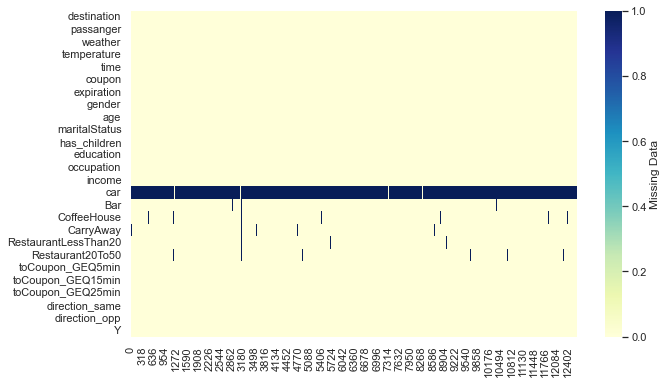

In [441]:
# Plot the missing data as heatmap and saving the figure to the images folder.
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("images/Missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

# Plot the list of missing data as percetages
(data.isnull().sum()/(data.shape[0])) *100



3. Decide what to do about your missing data -- drop, replace, other...

The missing data will be filled with mode(). The data could also have been filled with a random value, but it could give unintended values that were not needs or that will skew the data. But, mode() can work ith numeric or strings, so it was decided to be used to fill in the missing data. 

The heatmap shows that the data has been cleaned up. The car column has been removed and the missing NaN data has been filled with mode() function data which will choose something that is similar to the mean() function. 

In [442]:
# We will drop the CAR data since it has 99% of missing data
data2 = data.drop(columns=['car'], axis = 1)

#The categories which have been missing data willbe fixed with mode(), and it is very close in resembling mean()
# 'CoffeeHouse', 'Bar', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
data2['CoffeeHouse'].fillna(data2['CoffeeHouse'].mode()[0], inplace=True)
data2['Bar'].fillna(data2['Bar'].mode()[0], inplace = True)
data2['CarryAway'].fillna(data2['CarryAway'].mode()[0], inplace =True)
data2['RestaurantLessThan20'].fillna(data2['RestaurantLessThan20'].mode()[0], inplace = True)
data2['Restaurant20To50'].fillna(data2['Restaurant20To50'].mode()[0], inplace = True)


In [443]:
# Plot the list of missing data as percentages
(data2.isnull().sum()/(data2.shape[0])) *100

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
dtype: float64

In [444]:
#Checking the datatypes for the categories
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

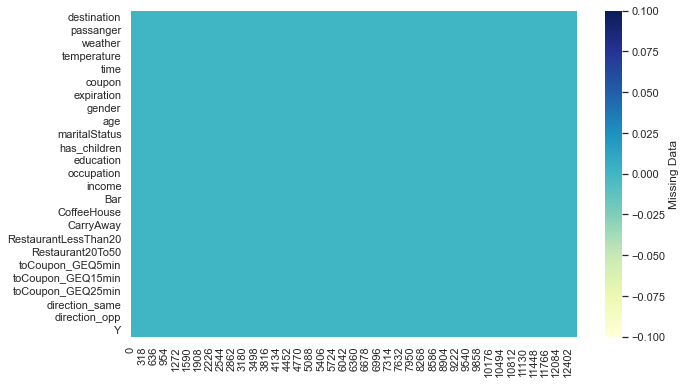

In [445]:
# Plot the missing data, if there is any left, as a heatmap
# The data is shown to have been cleaned up.
plt.figure(figsize=(10,6))
sns.heatmap(data2.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("images/Missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [446]:
# The data from the Y category is counted for the No's and Yes's. The 'Yes' is equal to 1 and the 'No' to 0. 
data2["Y"].value_counts(normalize=True)

1    0.568433
0    0.431567
Name: Y, dtype: float64

4. What proportion of the total observations chose to accept the coupon? 

The share of the coupon acceptance and coupon refusal is shown in the pie chart. There is no severe imbalance in class, but we still need to consider other imbalances of the data on the other catgories. The 43.2% of the people did not accept the coupon, while the 56.8% accepted the coupon.

We took into consideratin the weather influence, and sunny weather proved to be favorable when choosing to accept the coupon. 

The data is further analyzed with the countplot() and heatmap() functions. The crosstab() funtion is also used to show the numerical coounts among the coupon types. All this is done to understand how much data and to show the diverse coupon category counts/types. 


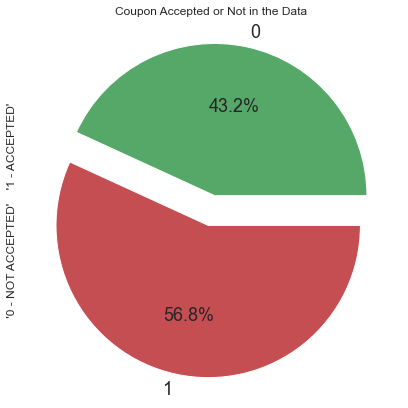

In [447]:
#Plot the pie chart for acceptance and not acceptance
df = data2.groupby('Y').size()


# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(7, 7), autopct='%0.1f%%', explode = [0.1,0.1],  colors=['g', 'r'], fontsize=18)
plt.title("Coupon Accepted or Not in the Data")
plt.ylabel(" '0 - NOT ACCEPTED'    '1 - ACCEPTED'")
plt.show()

In [448]:
round(pd.crosstab(data2['weather'], ['Y'], normalize = True)*100,2)

col_0,Y
weather,
Rainy,9.54
Snowy,11.08
Sunny,79.38


C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



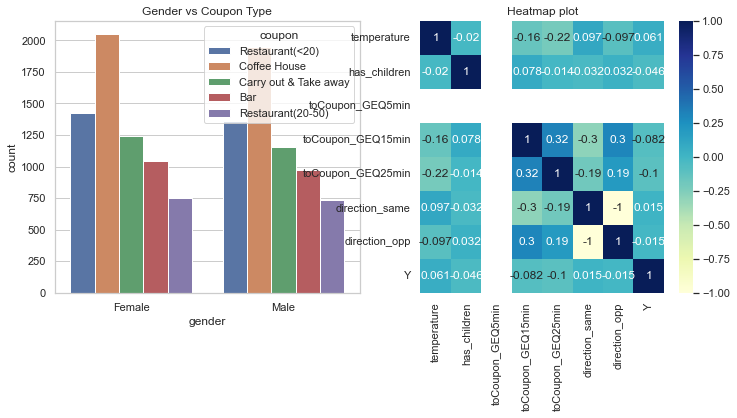

In [449]:
# Plotting the box plots to show the different distribution of coupon types in the data with gender differences
import seaborn as sns
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Gender vs Coupon Type")
sns.countplot("gender", hue="coupon", data = data2)
plt.subplot(122)

# plotting correlations as heatmap
plt.title("Heatmap plot")
dataplot = sns.heatmap(data2.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [450]:
pd.crosstab(data2["coupon"],data2['gender'])

gender,Female,Male
coupon,,
Bar,1045,972
Carry out & Take away,1240,1153
Coffee House,2051,1945
Restaurant(20-50),754,738
Restaurant(<20),1421,1365


5. Use a bar plot to visualize the `coupon` column.

Several bar plots are plotted to have a variety of plots to choose from. There may be some relational plots that are not useful, and others that may show some interesting or distinct results where we can further plot the relationships of interest between the catgorical columns. We are trying to visualize what information will be of interest and if more plots are necessary.

By just glancing at the plots, it appears that the unemployed who are alone and have no urgent place to go might choose a cheap restaurant, coffeehouse, or bar coupons. Students also fit this category of focus. The carry away (or the to go) restaurant seems to be the most popular which beats the more expensive restaurants. These are just assumptions we are making by glancing at the plots. Further analysis will need to be taken to ensure that our assumptions are correct. Or we may find ourselves asking for more data.

We may need to consider if the data was taken at random places/neighborhoods/business districts or it was just biased towards somewhere close to a university district or an affluent neighborhood. We just do not know for sure, unless we speak to the source on where the data was taken. A total of 17 plots are shown below.

The acceptance of the coupons seems to be the more interesting data whic can almost conclusive data. The data shows that sunny days are the best options to give out the coupons which range from carryout, cheap retaurants, and coffeehouses. Teh younger crowd from 21 to 26 years old seem to take the most action if they have no urgent place to go within the enxt two hours. The Computer & Mathematical, Students, and Unemployed categories are the favorites in accepting the coupons. It is quite unusual to see the Computer & Mathematical accepting the coupons. Are they not making a descent wage? Or is the data taken in a tech influenced area, such as Silicon Valley. More questions arise. The other question is why do the folks only have at most one child. Are the young couples only available for this data?



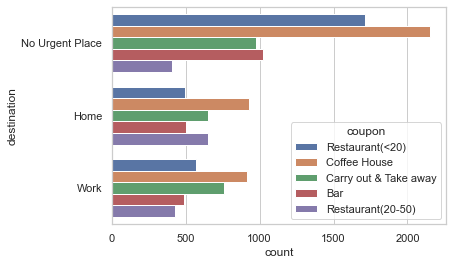

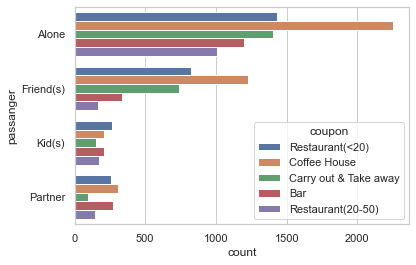

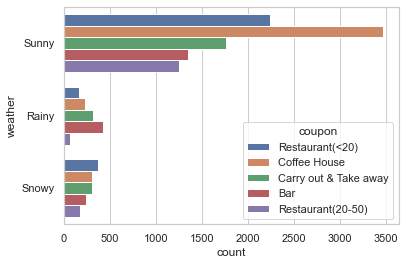

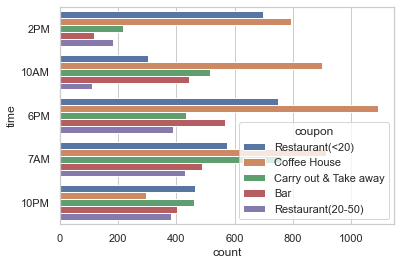

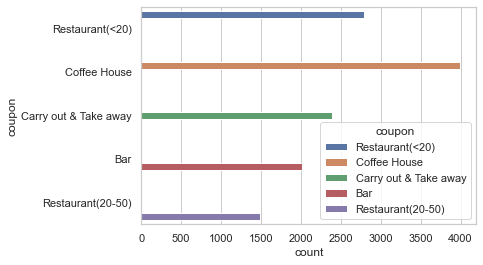

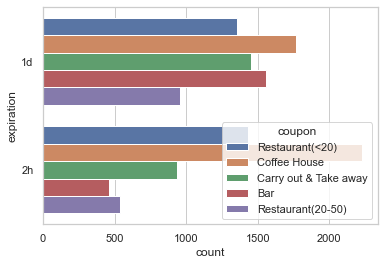

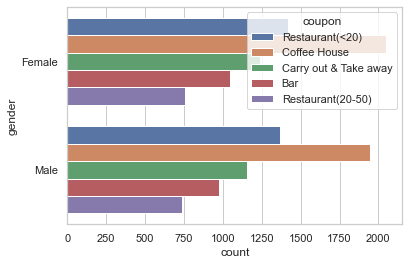

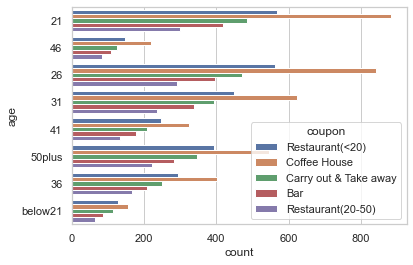

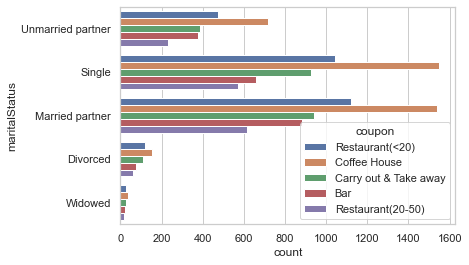

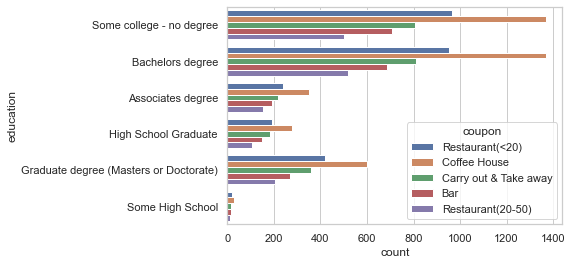

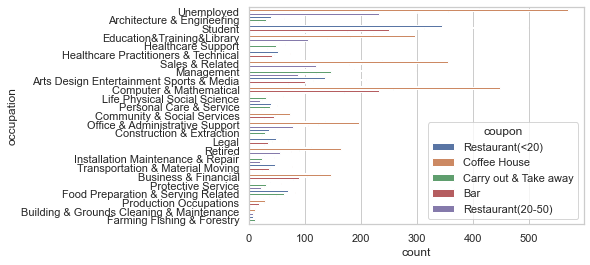

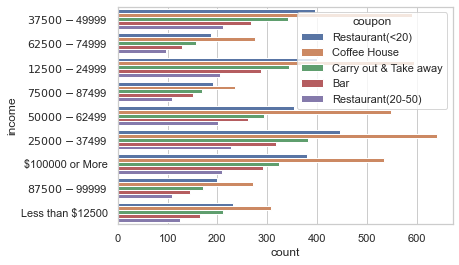

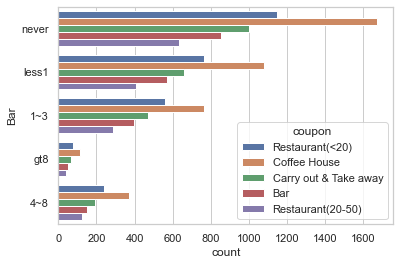

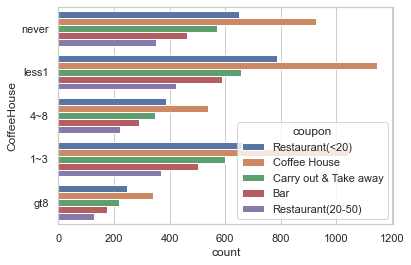

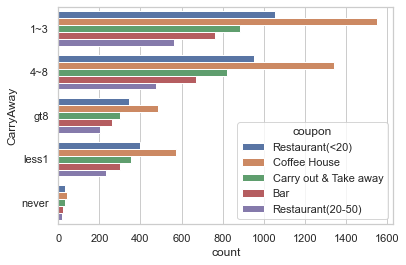

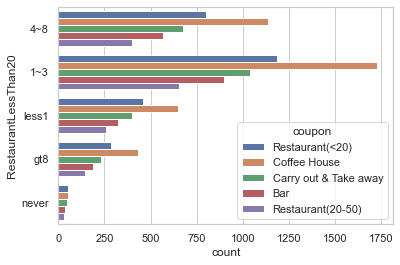

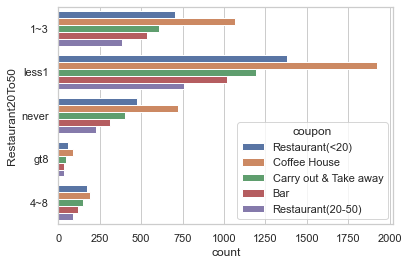

In [451]:
# set the background style of the plot
# Each category from the data is plotted while the coupon type is shown on each plot.
# A total of 17 plots are shown below


for col in data2.select_dtypes(include='object').columns:
    plt.figure()
    sns.countplot(data=data2, y=col, hue='coupon')

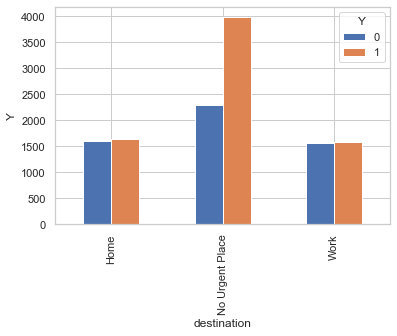

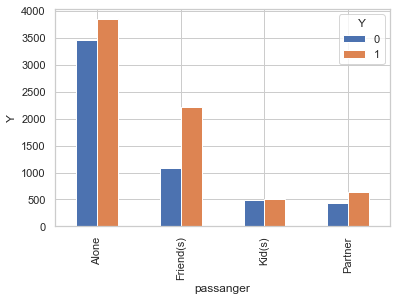

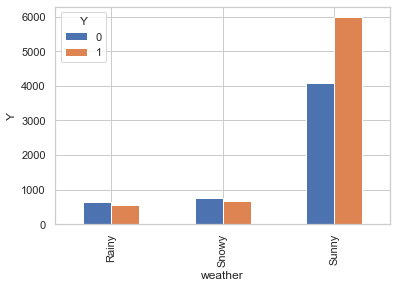

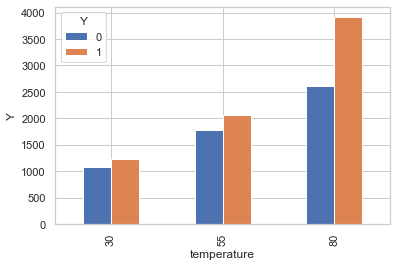

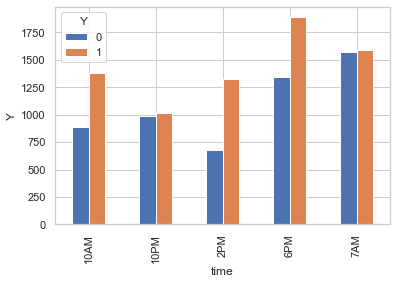

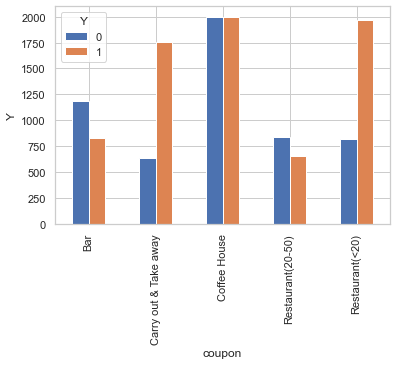

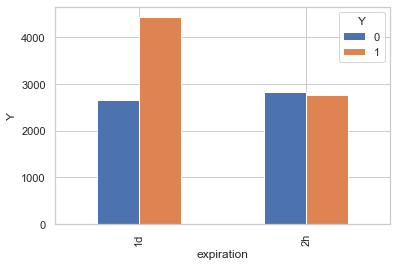

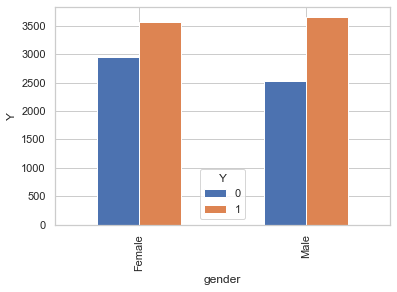

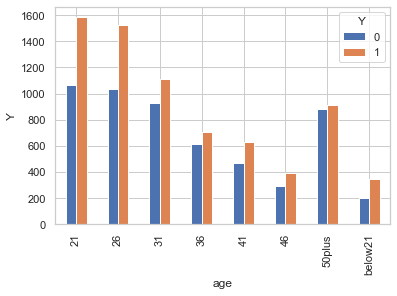

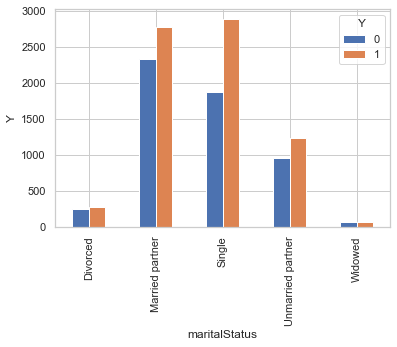

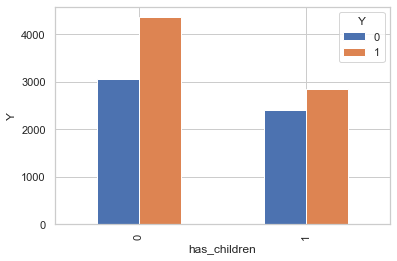

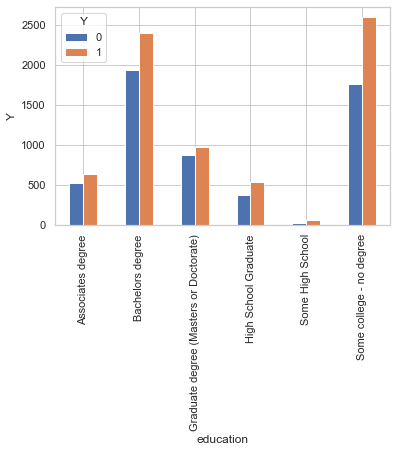

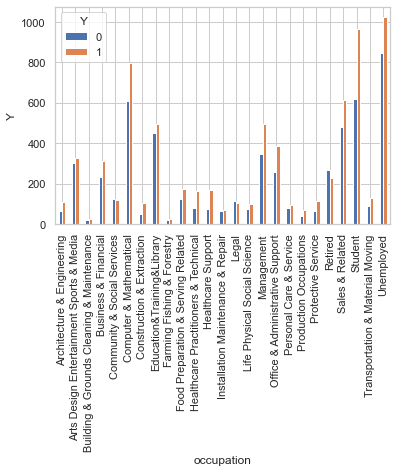

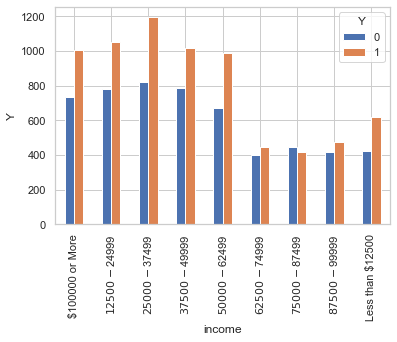

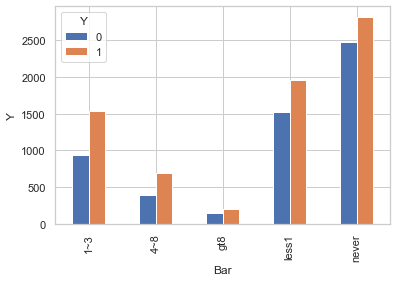

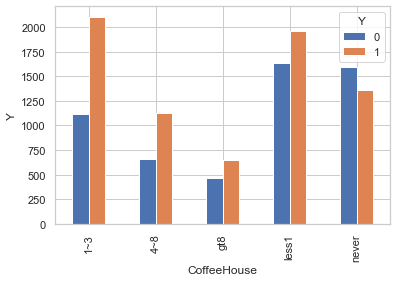

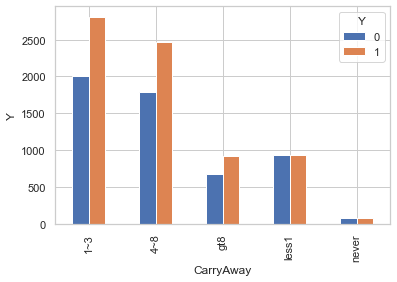

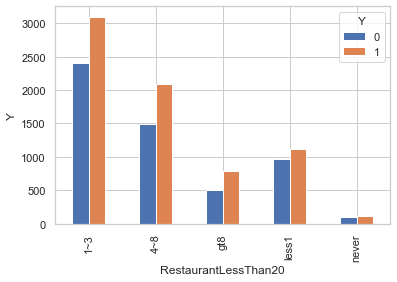

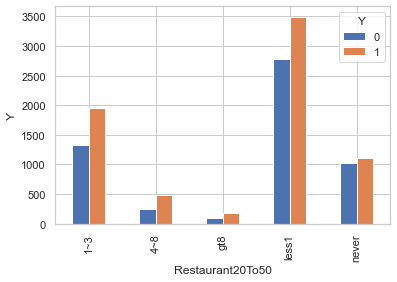

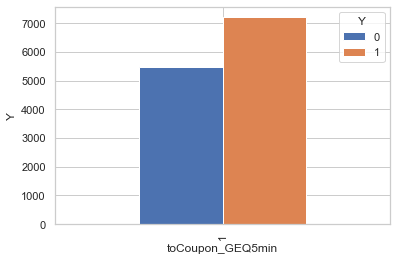

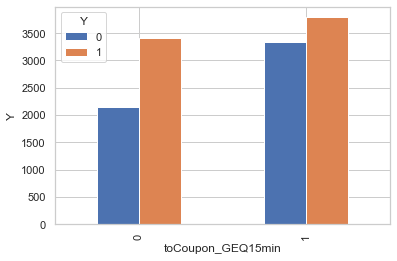

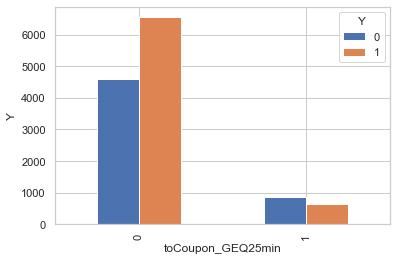

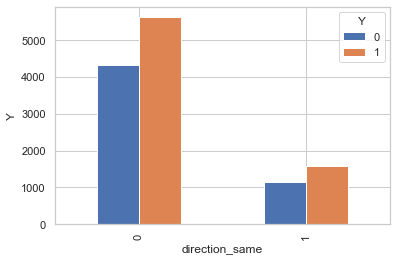

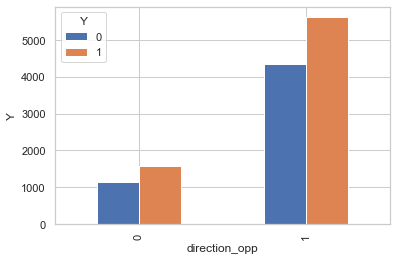

In [452]:
# The acceptance of the coupons are plotted

for col in data2.drop('Y', axis=1).columns:
    pd.crosstab(data2[col], data2['Y']).plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Y')
    plt.show()

6. Use a histogram to visualize the temperature column.

The temperature plots are shown at 30, 50, and 80 degres weather. The sunny weather seems to be the more preferred time for the coupon to be accepted. We still need to ask, is the data taken in a sunny state, such as California. In Minnesota, the data might be different, where sunny days are rare. 

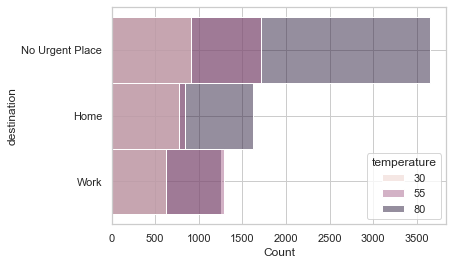

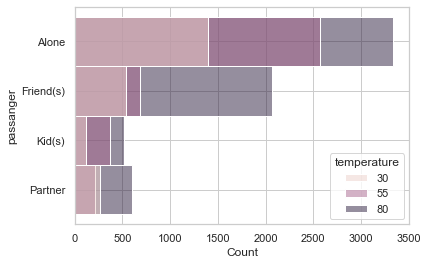

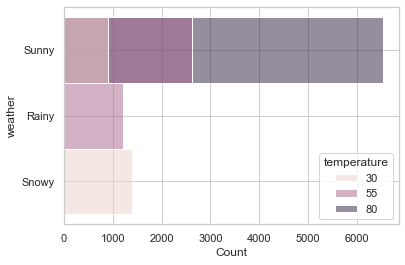

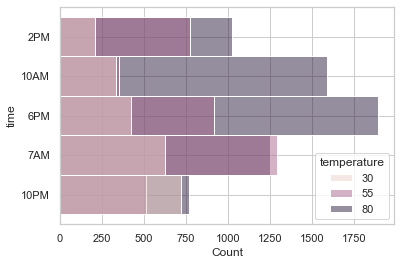

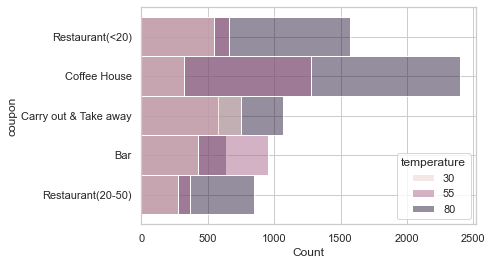

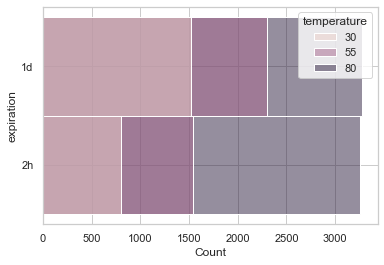

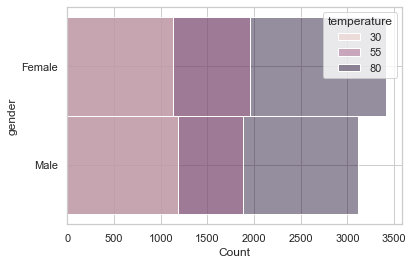

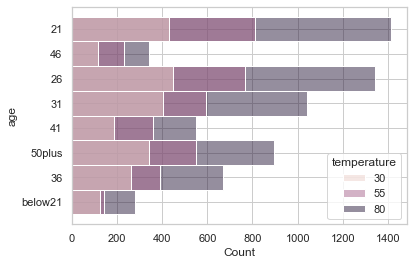

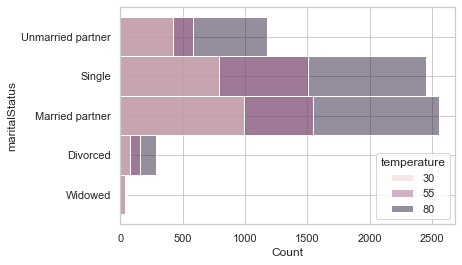

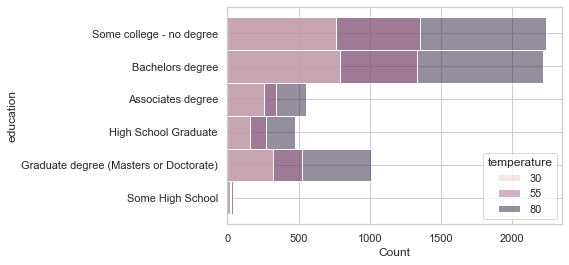

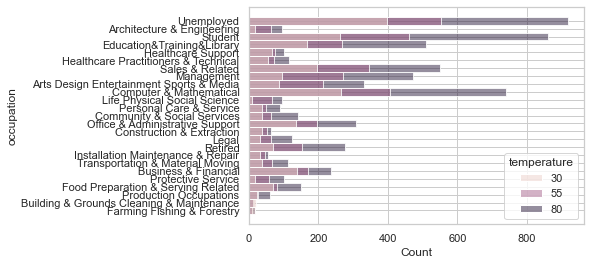

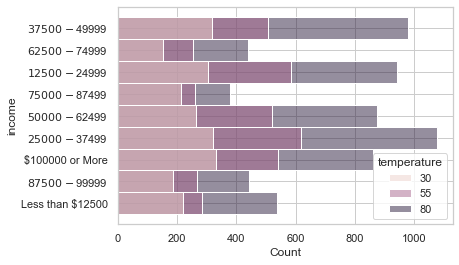

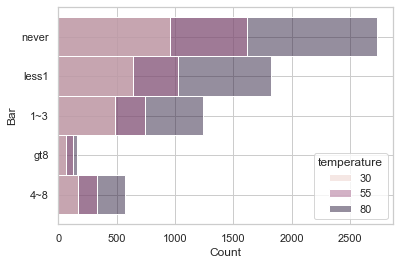

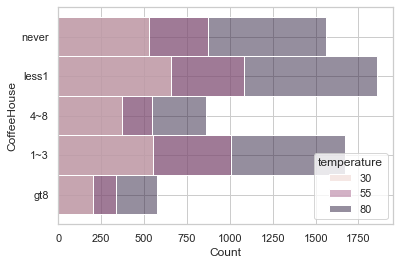

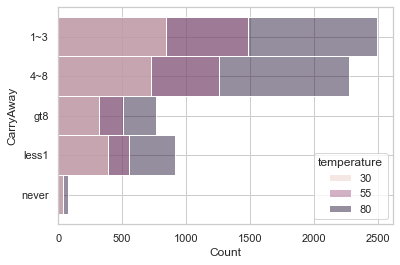

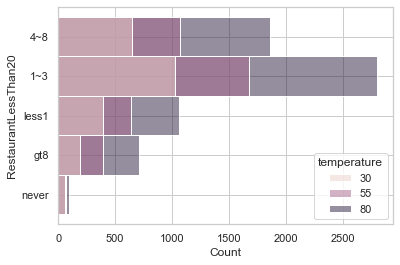

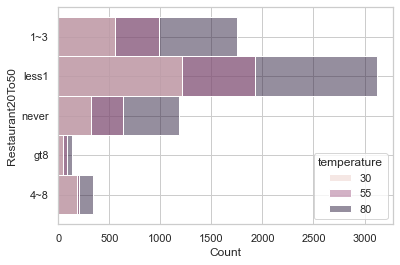

In [453]:
for col in data2.select_dtypes(include='object').columns:
    plt.figure()
    sns.histplot(data=data2, y=col, hue='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

A new dataframe is created for the bar coupons. This will allow for easier plotting and viewing that s focised entirely on the bar coupons.  


In [454]:
# The coupon types are shown and grouped with Acceptance ('Y')
data_bar = data2.drop(columns=['CoffeeHouse','CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], axis = 1)
data_bar.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   destination        12684 non-null  object
 1   passanger          12684 non-null  object
 2   weather            12684 non-null  object
 3   temperature        12684 non-null  int64 
 4   time               12684 non-null  object
 5   coupon             12684 non-null  object
 6   expiration         12684 non-null  object
 7   gender             12684 non-null  object
 8   age                12684 non-null  object
 9   maritalStatus      12684 non-null  object
 10  has_children       12684 non-null  int64 
 11  education          12684 non-null  object
 12  occupation         12684 non-null  object
 13  income             12684 non-null  object
 14  Bar                12684 non-null  object
 15  toCoupon_GEQ5min   12684 non-null  int64 
 16  toCoupon_GEQ15min  12684 non-null  int64

2. What proportion of bar coupons were accepted?

The proportion is 7210/(5474+7210) =  56.84% of Yes's, and 5474/(5474+7210)= 43.16% of No's.


In [455]:
# the bar coupons are shown with acceptance (Yes or No)
# The dataframe is grouped with 'Y' column
data_bar_count = data2.groupby(by = 'Y')['Bar'].count()
data_bar_count

Y
0    5474
1    7210
Name: Bar, dtype: int64

Text(0.5, 1.0, 'Coupon Accepted or Not in the Data')

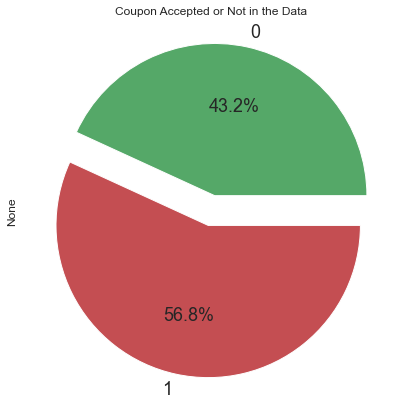

In [456]:
#Plot the percentage of acceptance as a pie plot

df = data_bar.groupby('Y').size()
df.plot(kind='pie', subplots=True, figsize=(7, 7), autopct='%0.1f%%', explode = [0.1,0.1],  colors=['g', 'r'], fontsize=18)
plt.title("Coupon Accepted or Not in the Data")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

The plots shown below show teh percentages of those people who went to bars 3 or fewer times. The increase is at around 3% in sales when the coupons are accepted.


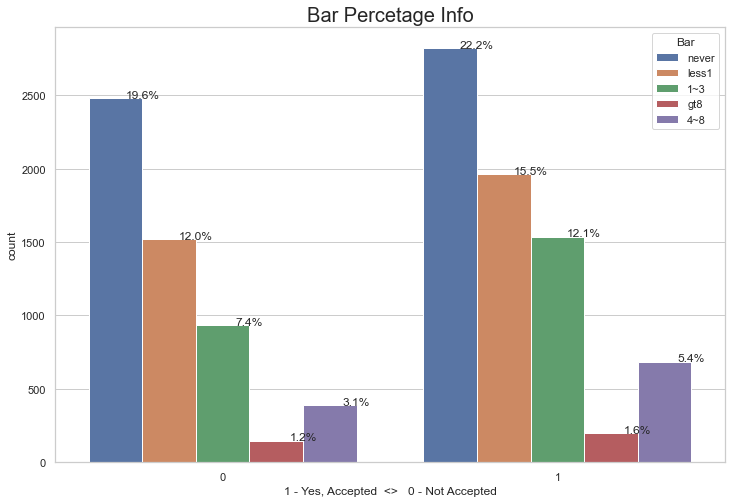

In [457]:
# The bar plot is shown for Bar category
data_bar_count = data2.groupby(by = 'Y')['Bar'].count()
data_bar_count

pd.crosstab(data_bar.Bar,data_bar.Y)
# Percentage that accepted the BAR coupons was 7210/(5474+7210) = 56.84%
# The whitegrid plot is created.
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(data_bar))
#The countplot from seaborn is created to show the accepted and not accepted.
ax = sns.countplot(x="Y", hue="Bar", data=data_bar)
plt.title('Bar Percetage Info', fontsize=20)
plt.xlabel("1 - Yes, Accepted  <>   0 - Not Accepted")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

The data6 dataframe has people over the ages of 25 and go to the bar once a month.
Code:
data6['Bar'].value_counts()

The analysis shows:
1~3    1463
4~8     701
gt8     195
Name: Bar, dtype: int64
The total survyed was 12683. 
1463+701+195= 2359 over 25 yrs old.
2359/12683 = 18.60%

Yes, there is a drastic difference where the 1-3 bar visits per month beats out the other visits at more than 4 times per month. Those that accepted the coupon did visit the bar more freqiently at 3% higher than those that did not accept the coupon.

The ages between 21 and 31 are the prime customers for the bars and giving them coupons would entice them even more to visit the bars more often.

The data showing the lower ages, below 21, shows that the data needs to be cleaned up a bit. The survey contains ages as 'Below21' and '50plus'. It would have been best to include the actual ages for the younger and older crowd. The data is limited for ages between 21 and 50 years old for those visiting the bars with coupons.

The two plots below who that the younger ages are more prone to visit the bar 1-3 times more often than a 30 year old. At 30, the half of the customers are reduced, which shows that the younger crowd between 21-25 years old, should have coupons that are written with their intrests in mind. 

The the crowd that goes to the bar 4 to 8 times per month is much less and the coupons should not be focused on them.



C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



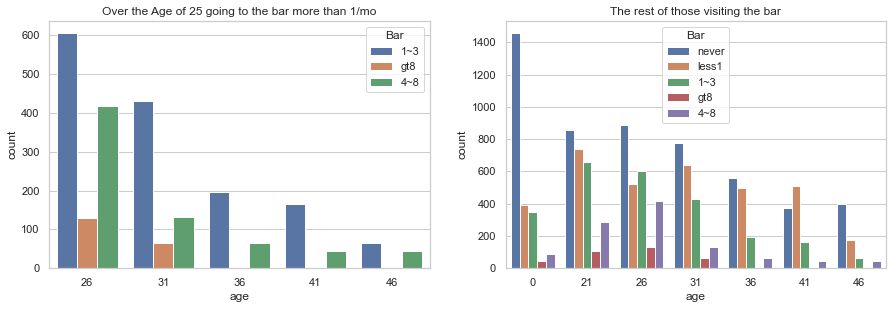

The numbers given for those over 25


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
110,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
111,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
113,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,0,0,1,0
114,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1


In [458]:
# Covert string to Integer. You cannot compare 25 years old value with strings. Therefore, this
# needs to be corrected.
# The code below is making sure the age value is NOT a string and then it is converted to an integer, if it's a string
#
# The code below is used to check teh data type of the values. They could be string or integers. We are mainly interested 
# in using integers for the ages. This make sit easier to compare values.
# print(type(data2['age'][:1][0]))
# The string sare converted to integers for the age column
data2.age = pd.to_numeric(data2.age, errors='coerce').fillna(0).astype(np.int64)
#print(type(data2['age'][:1][0]))

# The data4 dataframe is filtered for the Bar column where more than 1 visit was made
data4 = data2.loc[data2['Bar'].str.contains("1~3|4~8|gt8" )]
# The data6 dataframe is used to filter the data where the age is above 25 years old.
data6 = data4.loc[data4['age'].astype(int)  > 25]

# The plots are made for numeric counts
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Over the Age of 25 going to the bar more than 1/mo')
# This commented plot below could be used also
#sns.histplot(data= data6, x = 'age')
sns.countplot(data6['age'], hue=data6['Bar'])


plt.subplot(222)
plt.title('The rest of those visiting the bar')
sns.countplot(data2['age'], hue=data2['Bar'])

#sns.countplot(data = data6, x = "age")
#sns.distplot(data= data6, x = "age", kde= True)

plt.show()
print("The numbers given for those over 25")
# The over 25 crowd
data6['Bar'].value_counts()

# The rest of the crowd
#data2['Bar'].value_counts()

data6.head()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

 


<AxesSubplot:title={'center':'Occupation versus Passanger Type'}, xlabel='passanger', ylabel='Bar'>

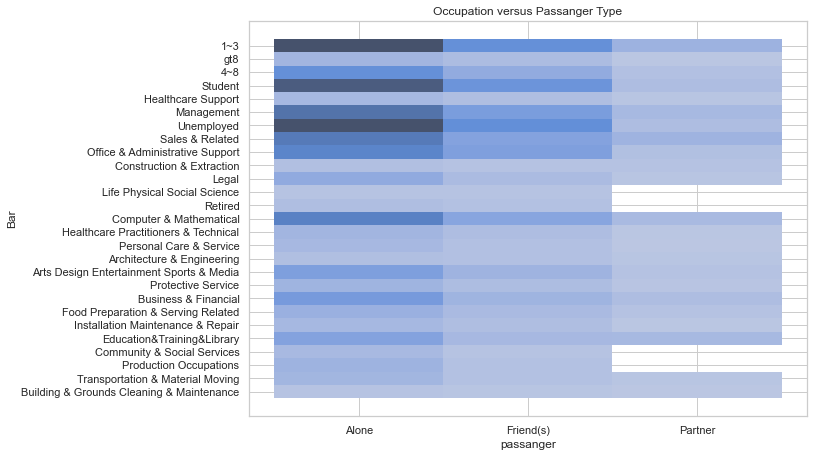

In [459]:
#The data frames are created to show the plots that are requested.
# The passanger is filtered with kid and occupation is filtered out with Farming|Fishing|Forestry

data7 = data4.loc[~data4['passanger'].str.contains("Kid*" )]

data8 = data7.loc[~data7['occupation'].str.contains("Farming|Fishing|Forestry")]

plt.figure(figsize=(22,16))
plt.subplot(222)
plt.title('Go to Bars more than once per month and are not into farming, fishing, or forestry')
sns.histplot(x="passanger", y="Bar", data=data8)

plt.subplot(222)
plt.title('Occupation versus Passanger Type')
sns.histplot(x="passanger", y="occupation", data=data8)



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

These are all compared and analyzed in bar graphs. The bar options of the number of visits are shown on the x-axis.


C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Under 30 yrs old and Bars at more than 1 time per month'}, xlabel='Bar', ylabel='count'>

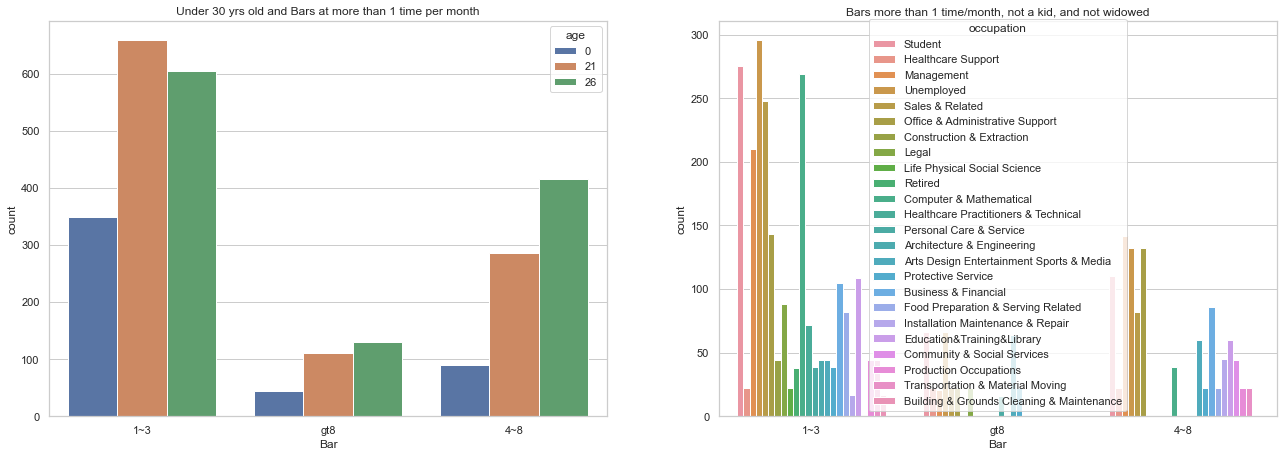

In [460]:
# "go to bars more than once a month, had passengers that were not a kid, and were not widowed OR"
data8 = data7.loc[~data7['occupation'].str.contains("Widowed")]

# "go to bars more than once a month and are under the age of 30 OR"
data9 = data4.loc[data4['age'].astype(int)  < 30]

# "go to cheap restaurants more than 4 times a month and income is less than 50K."
data10 = data2.loc[data2['RestaurantLessThan20'].str.contains("4~8|gt8" )]
data11 = data10.loc[data10['income'].str.contains('Less*|$12500*|$25000*|$37500*')]
#'Less than $12500'|'$12500 - $24999'|'$25000 - $37499'|'$37500 - $49999'"

#data11.head()
plt.figure(figsize=(22,16))
plt.subplot(222)
plt.title('Bars more than 1 time/month, not a kid, and not widowed')
sns.countplot(data8["Bar"], hue = data8["occupation"])

plt.subplot(221)
plt.title('Under 30 yrs old and Bars at more than 1 time per month')
sns.countplot(data9["Bar"], hue = data9["age"])
#print(type(data10['income'][:1][0]))

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

The unemployed and student are the strongest ones to get the coupon and who are also alone. Maybe coupon mightspark someone who is alone to do something exciting or pivot someone to use the coupon right away. Previous data shows that the coupon is used more often if it expires the same day. Instant gratification is a key motivator to use the coupon. The driving distance needs to be within 15 minutes, although the 5 minute distance info was missing.



C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'toCoupon_GEQ5min versus Occupation'}, xlabel='toCoupon_GEQ5min', ylabel='count'>

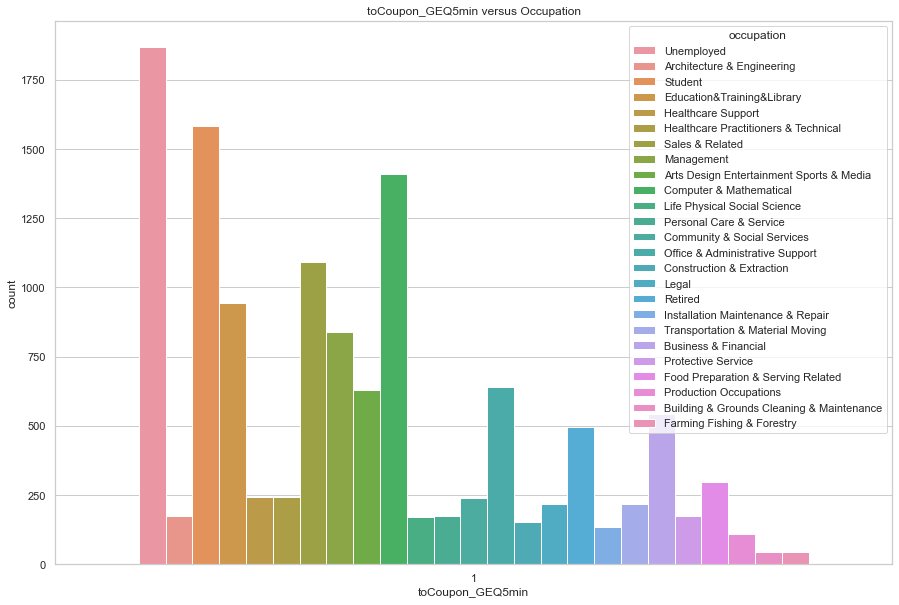

In [461]:
plt.figure(figsize = (15,10))
plt.title('toCoupon_GEQ5min versus Occupation')
sns.countplot(data2["toCoupon_GEQ5min"], hue = data2["occupation"])

C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'toCoupon_GEQ15min versus Occupation'}, xlabel='toCoupon_GEQ15min', ylabel='count'>

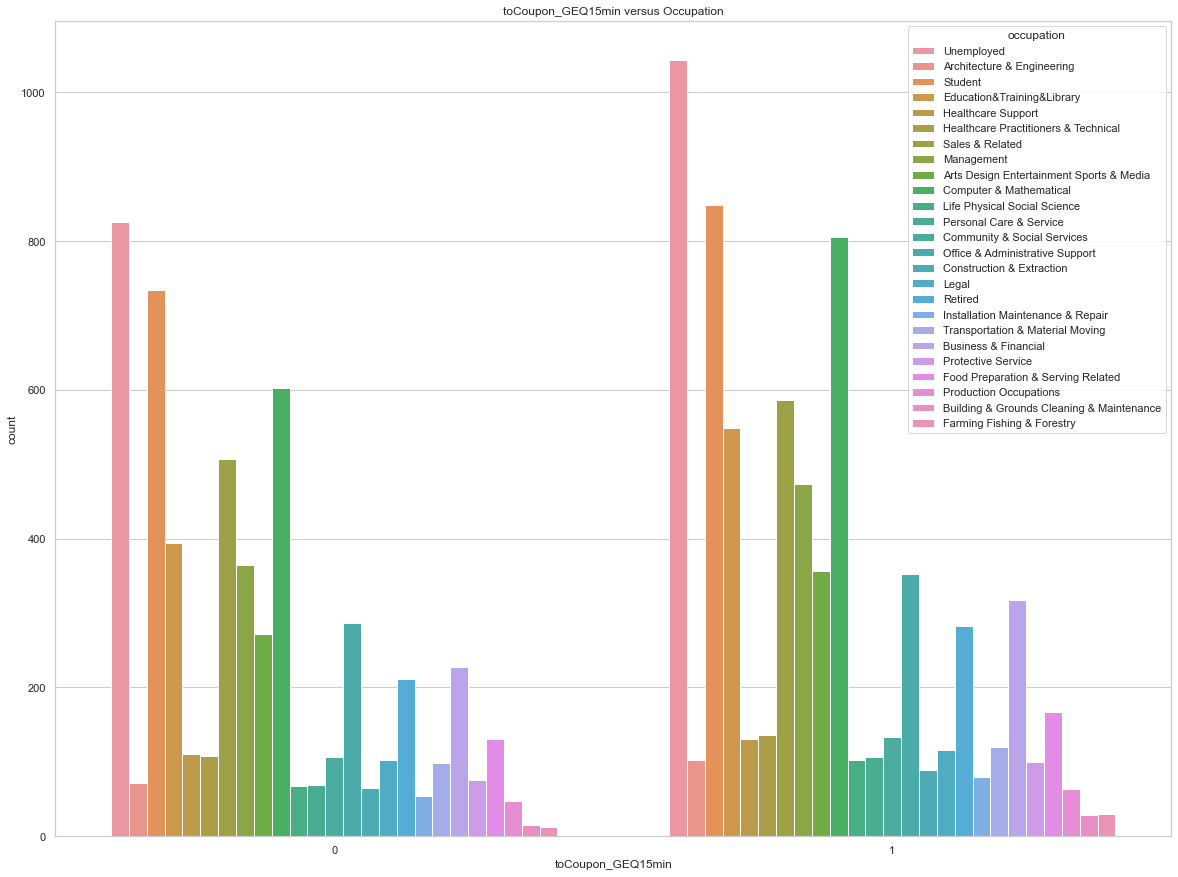

In [462]:
plt.figure(figsize = (20,15))
plt.title('toCoupon_GEQ15min versus Occupation')
sns.countplot(data2["toCoupon_GEQ15min"], hue = data2["occupation"])

C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'toCoupon_GEQ25min versus Occupation'}, xlabel='toCoupon_GEQ25min', ylabel='count'>

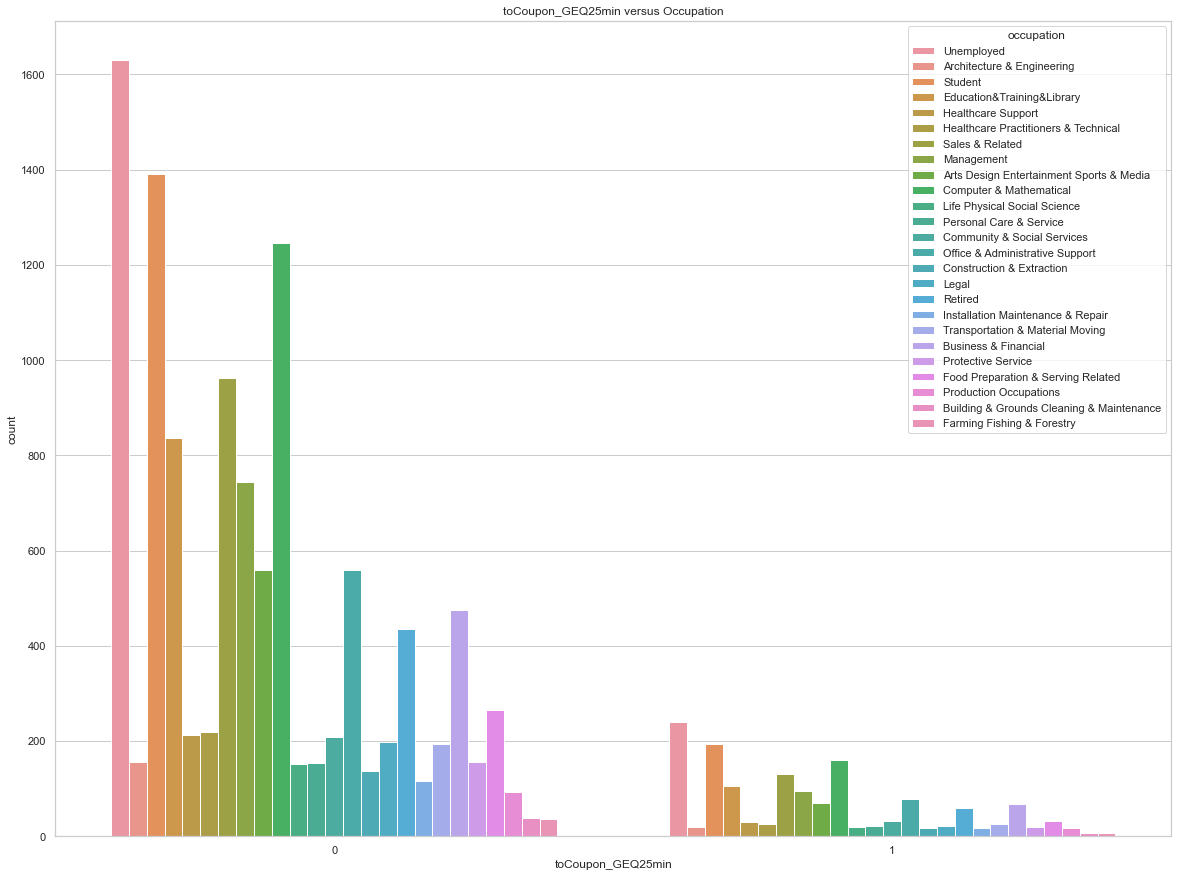

In [463]:
# The figures are plotted for occupation
plt.figure(figsize = (20,15))
plt.title('toCoupon_GEQ25min versus Occupation')
sns.countplot(data2["toCoupon_GEQ25min"], hue = data2["occupation"])

In [464]:
# Teh correlation are shown below
data2.corr()

,temperature,age,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,0.004853,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
age,0.004853,1.000000,0.097584,NaN,0.012568,-0.009348,-0.015900,0.015900,0.011095
has_children,-0.019716,0.097584,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.012568,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.009348,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.015900,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.015900,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,0.011095,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


<AxesSubplot:>

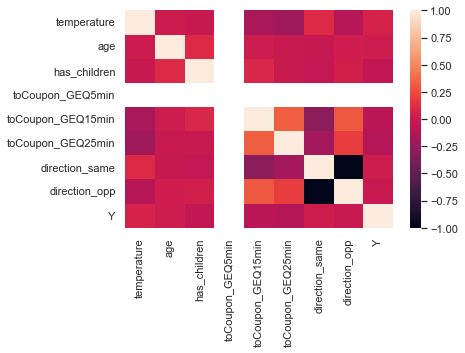

In [465]:
# The heatmap is plotted for some categories
sns.heatmap(data2.corr())